In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

      duty     chan0     chan1
901     90  1.003218  1.506464
39       3  1.058054  1.754864
2492   249  0.990327  1.222564
366     36  1.109668  1.680641
753     75  1.016109  1.545136


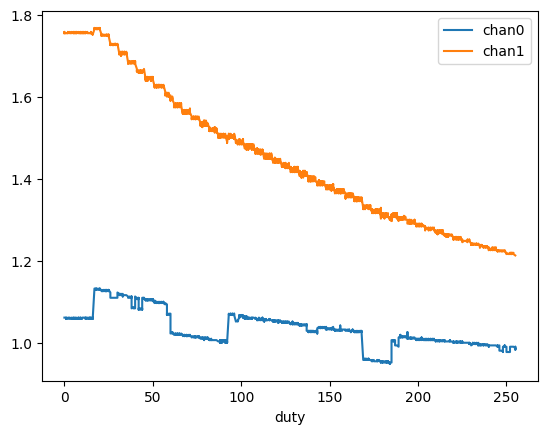

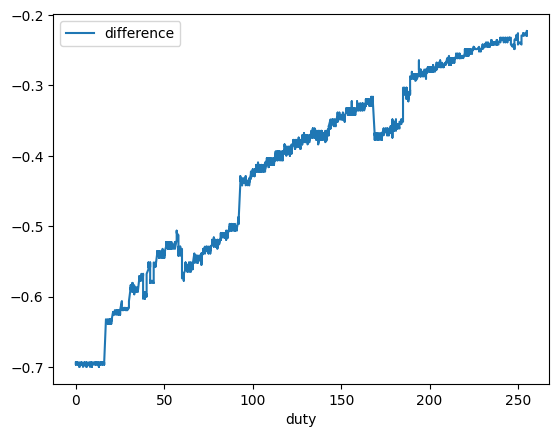

In [41]:
df = pd.read_csv('calibration_data.csv')
print(df.sample(5))

df.plot(x="duty")
plt.show()

df['difference'] = df.chan0 - df.chan1
df.plot(x="duty",y='difference')
plt.show()

In [42]:
X = np.array(df[['duty', 'chan1']])
y = np.array(df['chan0']) # magnet and permanent magnet

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train regression model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9931447926943013

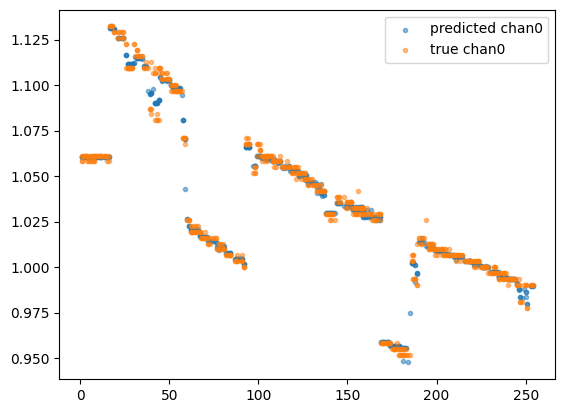

In [43]:
plt.scatter(X_test[:,0], model.predict(X_test), label='predicted chan0', marker='.', alpha=0.5)
plt.scatter(X_test[:,0], y_test, label='true chan0', marker='.',alpha=0.5)
plt.legend()

In [44]:
pred = model.predict(np.array([0,1.6]).reshape(1,-1))[0]

pred

1.0445616368981994

In [45]:
2.4 - pred

1.3554383631018005